<a href="https://colab.research.google.com/github/sylviarezk/Dataanalytics-2023/blob/main/capstone_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- import pandas,scikit-learn and read csv file





In [2]:
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sylviarezk/Dataanalytics-2023/main/New_York_City_Leading_Causes_of_Death.csv')

# 2- explore the data

In [ ]:
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.


In [ ]:
df.shape

(1803, 7)

In [ ]:
df.dtypes

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                     float64
Death Rate                 float64
Age Adjusted Death Rate    float64
dtype: object

#3- cleaning and tiding

In [6]:
numeric_columns = ['Deaths', 'Death Rate','Age Adjusted Death Rate']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
df.isnull().sum()

Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                     138
Death Rate                 607
Age Adjusted Death Rate    607
dtype: int64

In [8]:
df_clean = df.dropna(subset=['Deaths'])

#* applying linear regression model to predict the missing death rate data through the deaths

In [9]:
known_data = df_clean[df_clean['Death Rate'].notna()]
missing_data = df_clean[df_clean['Death Rate'].isna()]

# Features for prediction
features = ['Deaths']

# Fit a linear regression model
model = LinearRegression()
model.fit(known_data[features], known_data['Death Rate'])

# Predict missing values
predicted_death_rate = model.predict(missing_data[features])

# Update missing values in the DataFrame
df_clean.loc[df_clean['Death Rate'].isna(), 'Death Rate'] = predicted_death_rate

In [10]:
df_clean['Sex'].unique()

array(['M', 'F', 'Male', 'Female'], dtype=object)

In [11]:
df_clean['Race Ethnicity'].unique()

array(['White Non-Hispanic', 'Hispanic', 'Not Stated/Unknown',
       'Asian and Pacific Islander', 'Black Non-Hispanic',
       'Other Race/ Ethnicity', 'Non-Hispanic Black',
       'Non-Hispanic White'], dtype=object)

In [12]:
df_clean_copy = df_clean.copy()
df_clean_copy.loc[:, 'Sex'] = df_clean_copy['Sex'].replace(('M', 'F'), ('Male', 'Female'))

In [13]:
df_clean_copy_2 = df_clean_copy.copy()
df_clean_copy_2.loc[:, 'Race Ethnicity'] = df_clean_copy_2['Race Ethnicity'].replace(('White Non-Hispanic', 'Black Non-Hispanic'), ('Non-Hispanic White', 'Non-Hispanic Black'))

In [14]:
df_clean_copy_2['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df_clean_copy_2['Race Ethnicity'].unique()

array(['Non-Hispanic White', 'Hispanic', 'Not Stated/Unknown',
       'Asian and Pacific Islander', 'Non-Hispanic Black',
       'Other Race/ Ethnicity'], dtype=object)

In [16]:
df_clean_analysis = df_clean_copy_2[['Year','Leading Cause','Sex','Race Ethnicity','Deaths','Death Rate']]

#4- descriptive analysis

In [17]:
df_years = df_clean_analysis.groupby('Year')['Death Rate'].sum().sort_values(ascending=False)

<Axes: xlabel='Year'>

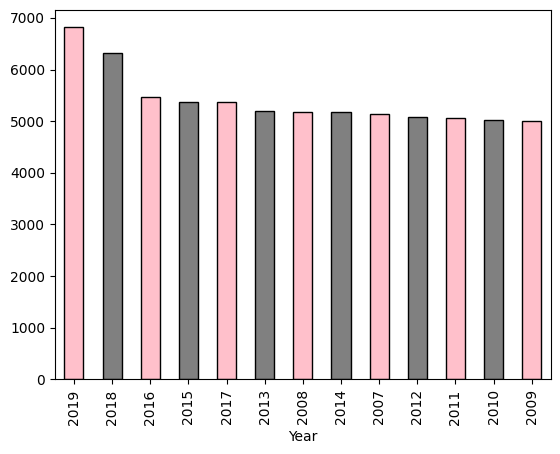

In [21]:
df_years.plot(kind='bar',color = ('pink','grey'),edgecolor='black')

In [22]:
df_2019 = df_clean_analysis.loc[df_clean['Year'] == 2019]

In [54]:
df_causes = df_2019.groupby('Leading Cause')['Deaths'].sum().sort_values(ascending=False)

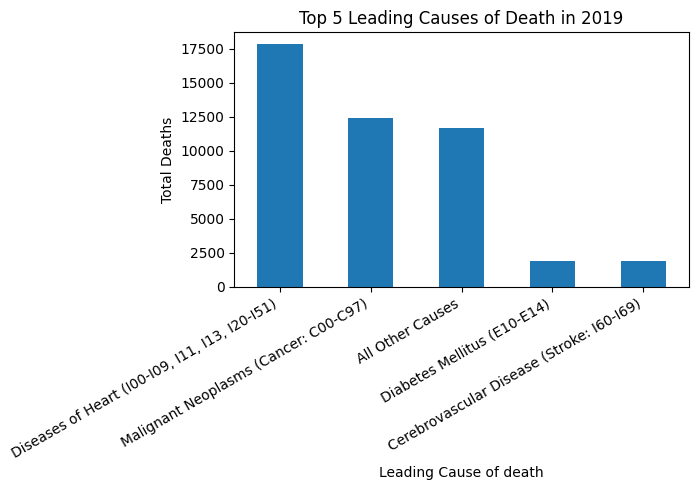

In [65]:
top_n = 5
top_causes = df_causes.head(top_n)

# Create a bar plot for the selected top causes
plt.figure(figsize=(7,5))
top_causes.plot(kind='bar')
plt.xlabel('Leading Cause of death')
plt.ylabel('Total Deaths')
plt.title(f'Top {top_n} Leading Causes of Death in 2019')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [71]:
df_heart = df_clean_analysis.loc[df_clean['Leading Cause'] =='Diseases of Heart (I00-I09, I11, I13, I20-I51)']

In [72]:
df_grouped_heart_sex = df_heart.groupby('Sex')['Death Rate'].sum()

Text(0.5, 1.0, 'Death rate Due to Heart Diseases by Sex')

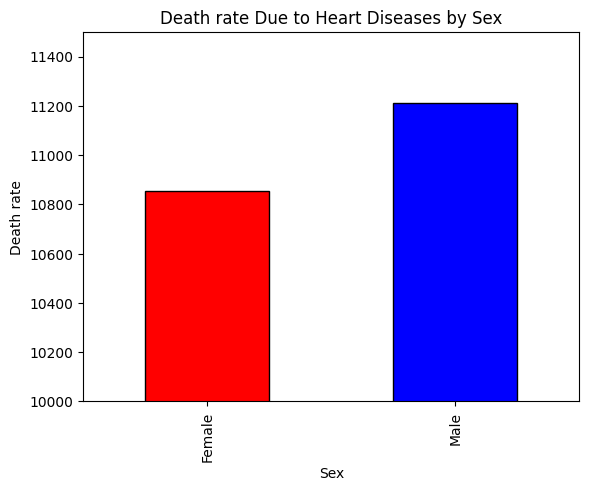

In [73]:
df_grouped_heart_sex.plot(kind='bar',color = ('red','blue') ,ylim=(10000,11500),edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Death rate')
plt.title('Death rate Due to Heart Diseases by Sex')


In [74]:
df_grouped_heart_year = df_heart.groupby('Year')['Death Rate'].sum()

Text(0.5, 1.0, 'Death rate Due to Heart Diseases by year')

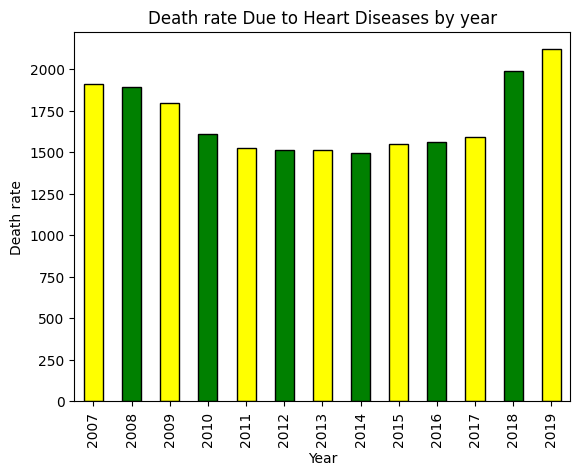

In [ ]:
df_grouped_heart_year.plot(kind='bar',color=('yellow','green'),edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Death rate')
plt.title('Death rate Due to Heart Diseases by year')

In [75]:
df_grouped_heart_race = df_heart.groupby('Race Ethnicity')['Death Rate'].sum().sort_values(ascending=False)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Non-Hispanic White'),
  Text(1, 0, 'Non-Hispanic Black'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Asian and Pacific Islander'),
  Text(4, 0, 'Not Stated/Unknown'),
  Text(5, 0, 'Other Race/ Ethnicity')])

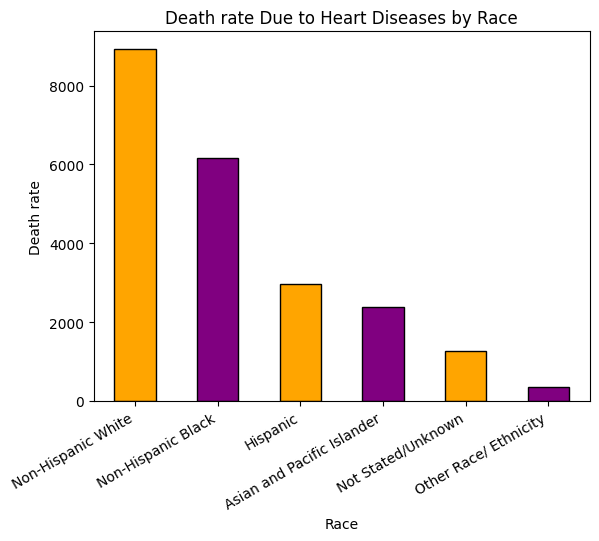

In [76]:
df_grouped_heart_race.plot(kind='bar',color=('orange','purple'),edgecolor='black')
plt.xlabel('Race')
plt.ylabel('Death rate')
plt.title('Death rate Due to Heart Diseases by Race')
plt.xticks(rotation=30, ha='right')